###  Изучаем общую информацию 

  У нас имеются данные 500 пользователей компании телекома за 2018 год, которые пользуются одним из тарифов "Смарт" или "Ультра". Наша задача сделать предварительный анализ тарифов, для корректировки рекламного бюджета, и определить какой из тарифов приносит больше денег.
  

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np


In [4]:
from scipy.stats import ttest_ind

In [5]:
from math import factorial

In [6]:
calls = pd.read_csv('/datasets/calls.csv')

In [7]:
internet = pd.read_csv('/datasets/internet.csv')

In [8]:
messages = pd.read_csv('/datasets/messages.csv')

In [9]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [10]:
users = pd.read_csv('/datasets/users.csv')

In [11]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
#меняем формат столбца 'call_date'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 

In [14]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [16]:
#меняем формат столбца 'session_date'
internet['session_date'] =  pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [17]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [19]:
#меняем формат столбца 'message_date'
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [22]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [23]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
#меняем формат столбца 'reg_date'
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [26]:
#проверяем пропуски
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [27]:
#проверяем пропуски
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [28]:
#проверяем пропуски
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [29]:
#проверяем пропуски
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff                   0
dtype: int64

In [30]:
#проверяем пропуски
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

<AxesSubplot:>

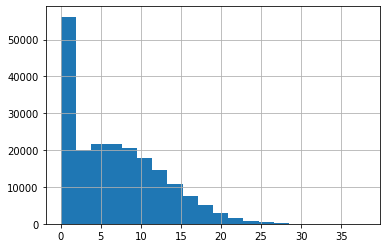

In [31]:
calls.duration.hist(bins=20)

<AxesSubplot:>

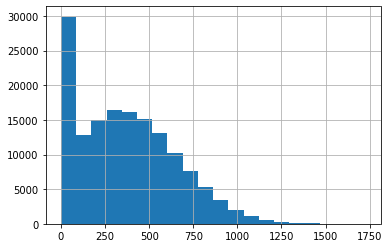

In [32]:
internet.mb_used.hist(bins=20)

####  Вывод
 Извлекли информацию из файлов. Где нужно изменили тип данных и название столбца, проверили пропуски.

###  Подготавливаем данные

In [33]:
#создаем столбец с информацией о месяце 
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [34]:
call_count=calls.groupby(['user_id', 'month'], as_index=False).agg(calls_count=('id', 'count'),calls_sum=('duration', 'sum'))
call_count

,user_id,month,calls_count,calls_sum
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14
...,...,...,...,...
3169,1498,10,41,232.63
3170,1499,9,9,64.65
3171,1499,10,68,429.91
3172,1499,11,74,576.50


In [35]:
# выделим отдельно столбец с месяцем в таблице messages
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [36]:
message_sum = messages.groupby(['user_id', 'month'], as_index=False) \
                .agg(messages_sum=('id', 'count'))
message_sum

,user_id,month,messages_sum
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [37]:
#выделим отдельно столбец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [38]:
internet_sum = internet.groupby(['user_id', 'month'], as_index=False) \
                .agg(mb_used_sum=('mb_used', 'sum'))
internet_sum

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [39]:
call_with_message= call_count.merge(message_sum, on=['user_id', 'month'],how='outer')
call_with_message

,user_id,month,calls_count,calls_sum,messages_sum
0,1000,5,22.0,150.06,22.0
1,1000,6,43.0,158.90,60.0
2,1000,7,47.0,318.80,75.0
3,1000,8,52.0,389.87,81.0
4,1000,9,58.0,440.14,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [40]:
call_with_message_and_internet=call_with_message.merge(internet_sum, on=['user_id', 'month'],how='outer')
call_with_message_and_internet

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum
0,1000,5,22.0,150.06,22.0,2253.49
1,1000,6,43.0,158.90,60.0,23233.77
2,1000,7,47.0,318.80,75.0,14003.64
3,1000,8,52.0,389.87,81.0,14055.93
4,1000,9,58.0,440.14,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


In [41]:
call_with_message_and_internet=call_with_message_and_internet.fillna(0)
call_with_message_and_internet

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum
0,1000,5,22.0,150.06,22.0,2253.49
1,1000,6,43.0,158.90,60.0,23233.77
2,1000,7,47.0,318.80,75.0,14003.64
3,1000,8,52.0,389.87,81.0,14055.93
4,1000,9,58.0,440.14,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30
3210,1489,10,0.0,0.00,21.0,19559.44
3211,1489,11,0.0,0.00,20.0,17491.56
3212,1489,12,0.0,0.00,35.0,17322.51


In [42]:
data_with_tariff=call_with_message_and_internet.merge(users[['user_id','tariff', 'city']], on='user_id',how='left')
data_with_tariff

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург


In [43]:
data=data_with_tariff.merge(tariffs, on='tariff',how='left')
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3


In [44]:
#рассчитаем количество трафика сверх тарифа для каждого пользователя в гигабайтах
data['difference_trafic'] = (data['mb_used_sum'] - data['mb_per_month_included']) / 1024
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.799326
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.310771
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.324570
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.273506
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.772549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1.803027
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,4.101016
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2.081602
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1.916514


In [45]:
#округлим гигабайты до целого числа в большую сторону
data['difference_trafic'] = np.ceil(data.difference_trafic).astype('int')
data['difference_trafic']

0      -27
1       -7
2      -16
3      -16
4      -15
        ..
3209     2
3210     5
3211     3
3212     2
3213   -29
Name: difference_trafic, Length: 3214, dtype: int64

In [46]:
#сделаем подсчет стоимости интернета потраченного сверх трафика
data['difference_trafic_rb'] = data['difference_trafic'] * data['rub_per_gb']
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27,-4050
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7,-1050
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15,-2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,5,1000
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,3,600
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400


In [47]:
data['difference_message_rb'] = (data['messages_sum'] - data['messages_included']) * data['rub_per_message']
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27,-4050,-978.0
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7,-1050,-940.0
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400,-925.0
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400,-919.0
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15,-2250,-943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,-54.0
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,5,1000,-87.0
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,3,600,-90.0
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,-45.0


In [48]:
#Находим стоимость минут сверх тарифа
data['difference_call'] = data['calls_sum'] - data['minutes_included']
data['difference_call']

0      -2849.94
1      -2841.10
2      -2681.20
3      -2610.13
4      -2559.86
         ...   
3209    -500.00
3210    -500.00
3211    -500.00
3212    -500.00
3213   -3000.00
Name: difference_call, Length: 3214, dtype: float64

In [49]:
#округляем минуты
data['difference_call'] = np.ceil(data.difference_call).astype('int')
data['difference_call']

0      -2849
1      -2841
2      -2681
3      -2610
4      -2559
        ... 
3209    -500
3210    -500
3211    -500
3212    -500
3213   -3000
Name: difference_call, Length: 3214, dtype: int64

In [50]:
#считаем стоимость минут сверх тарифа
data['difference_call_rb'] = data['difference_call'] * data['rub_per_minute']
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb,difference_call,difference_call_rb
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27,-4050,-978.0,-2849,-2849
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7,-1050,-940.0,-2841,-2841
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400,-925.0,-2681,-2681
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,-2400,-919.0,-2610,-2610
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15,-2250,-943.0,-2559,-2559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,-54.0,-500,-1500
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,5,1000,-87.0,-500,-1500
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,3,600,-90.0,-500,-1500
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,-45.0,-500,-1500


In [51]:
#заменим отрицательные значения на 0
data.loc[data['difference_message_rb']<0, 'difference_message_rb']=0
data.loc[data['difference_trafic_rb']<0, 'difference_trafic_rb']=0
data.loc[data['difference_call_rb']<0, 'difference_call_rb']=0
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb,difference_call,difference_call_rb
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27,0,0.0,-2849,0
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7,0,0.0,-2841,0
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,0,0.0,-2681,0
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16,0,0.0,-2610,0
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15,0,0.0,-2559,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,0.0,-500,0
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,5,1000,0.0,-500,0
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,3,600,0.0,-500,0
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,500,550,200,3,3,2,400,0.0,-500,0


In [52]:
# рассчитаем общую выручку с каждого клиента по месяцам и сохраним в столбец 'users_total_income'
data['users_total_income'] = data['difference_trafic_rb'] + data['difference_message_rb'] + data['difference_call_rb'] + data['rub_monthly_fee']
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb,difference_call,difference_call_rb,users_total_income
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,...,1950,150,1,1,-27,0,0.0,-2849,0,1950.0
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,...,1950,150,1,1,-7,0,0.0,-2841,0,1950.0
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,...,1950,150,1,1,-16,0,0.0,-2681,0,1950.0
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,...,1950,150,1,1,-16,0,0.0,-2610,0,1950.0
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,...,1950,150,1,1,-15,0,0.0,-2559,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,...,550,200,3,3,2,400,0.0,-500,0,950.0
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,...,550,200,3,3,5,1000,0.0,-500,0,1550.0
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,...,550,200,3,3,3,600,0.0,-500,0,1150.0
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,...,550,200,3,3,2,400,0.0,-500,0,950.0


#### Вывод
 Для дальнейшей работы подсчитали следующие данные для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя.
 

### Анализируем данные

In [53]:
#Рассчитаем сколько трафика в месяц нужно клиентам каждого тарифа. Используем таблицу data.
data

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb,difference_call,difference_call_rb,users_total_income
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,...,1950,150,1,1,-27,0,0.0,-2849,0,1950.0
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,...,1950,150,1,1,-7,0,0.0,-2841,0,1950.0
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,...,1950,150,1,1,-16,0,0.0,-2681,0,1950.0
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,...,1950,150,1,1,-16,0,0.0,-2610,0,1950.0
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,...,1950,150,1,1,-15,0,0.0,-2559,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.00,32.0,17206.30,smart,Санкт-Петербург,50,15360,...,550,200,3,3,2,400,0.0,-500,0,950.0
3210,1489,10,0.0,0.00,21.0,19559.44,smart,Санкт-Петербург,50,15360,...,550,200,3,3,5,1000,0.0,-500,0,1550.0
3211,1489,11,0.0,0.00,20.0,17491.56,smart,Санкт-Петербург,50,15360,...,550,200,3,3,3,600,0.0,-500,0,1150.0
3212,1489,12,0.0,0.00,35.0,17322.51,smart,Санкт-Петербург,50,15360,...,550,200,3,3,2,400,0.0,-500,0,950.0


In [54]:
data.groupby('tariff')['mb_used_sum'].agg([np.mean, np.std, np.var])

,mean,std,var
tariff,,,
smart,16208.386990,5870.476681,3.446250e+07
ultra,19468.805208,10087.170752,1.017510e+08


<AxesSubplot:>

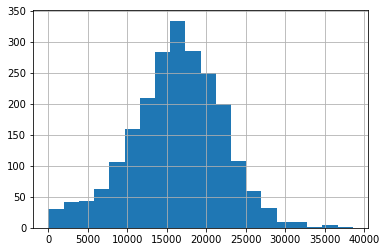

In [55]:
data[data.tariff=='smart'].mb_used_sum.hist(bins=20)

<AxesSubplot:>

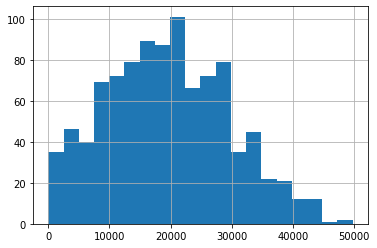

In [56]:
data[data.tariff=='ultra'].mb_used_sum.hist(bins=20)

In [57]:
#Рассчитаем сколько смс сообщений в месяц нужно клиентам каждого тарифа.
data.groupby(['tariff'])['messages_sum'].agg([np.mean, np.std, np.var])

,mean,std,var
tariff,,,
smart,33.384029,28.227876,796.812958
ultra,49.363452,47.804457,2285.266143


<AxesSubplot:>

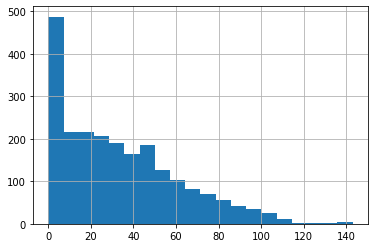

In [58]:
data[data.tariff=='smart'].messages_sum.hist(bins=20)

<AxesSubplot:>

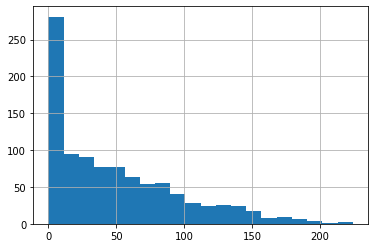

In [59]:
data[data.tariff=='ultra'].messages_sum.hist(bins=20)

In [60]:
#Рассчитаем сколько минут в месяц нужно клиентам каждого тарифа. 
data.groupby(['tariff'])['calls_sum'].agg([np.mean, np.std, np.var])

,mean,std,var
tariff,,,
smart,394.427026,179.962207,32386.395979
ultra,497.068223,299.904152,89942.500370


<AxesSubplot:>

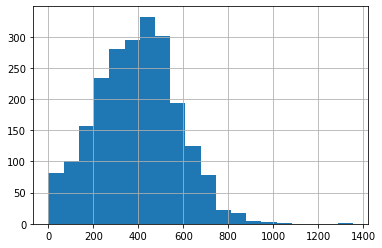

In [61]:
data[data.tariff=='smart'].calls_sum.hist(bins=20)

<AxesSubplot:>

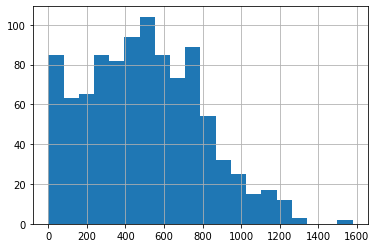

In [62]:
data[data.tariff=='ultra'].calls_sum.hist(bins=20)

#### Вывод
 По полученным данным видно, что пользователи тарифа "Ультра" в среднем используют больше смс, минут и трафика. Все гистограмы имеют биноминальное распределение. 

### Проверяем гипотезы

Для проверки гипотез будем использовать критерий t-теста, т.к выборки у нас независимы друг от друга и они достаточно большие.

 Проверим гипотезу о неравенстве средней выручки пользователей тарифов. Сформулируем нулевую гипотезу и альтернативную. H₀ - нулевая гипотеза. H₁ - альтернативная гипотеза.
H₀: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт». 
H₁:средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт». 
Альтернативная гипотеза двусторонняя, так мы узнаем отклонение в большую или меньшую сторону, если нулевая окажется ложью.
 Будем работать с таблицей users.

In [63]:
alpha = .05

In [64]:
data.groupby('tariff')['users_total_income'].agg([np.mean, np.std, np.var])

,mean,std,var
tariff,,,
smart,1257.588605,800.915599,641465.797016
ultra,2070.152284,376.187114,141516.745079


<AxesSubplot:>

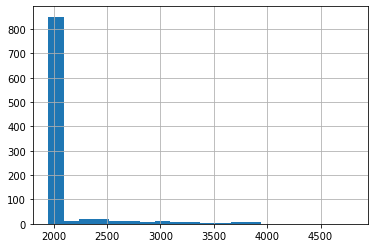

In [65]:
#построим гистограмму
data[data.tariff=='ultra'].users_total_income.hist(bins=20)

<AxesSubplot:>

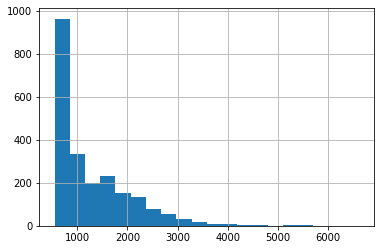

In [66]:
#построим гистограмму
data[data.tariff=='smart'].users_total_income.hist(bins=20)

In [67]:
ttest_ind(data[data.tariff=='ultra'].users_total_income, data[data.tariff=='smart'].users_total_income)

Ttest_indResult(statistic=30.392167350656806, pvalue=1.513773301175091e-178)

#### Вывод

 Из полученных данных можно сделать вывод, что средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт». Так как pvalue=1.513773301175091e-178 больше значения alpha. Нулевую гипотезу отвергаем.

  Проверим гипотезу о неравенстве средней выручки пользователей из Москвы и других регионов. Сформулируем нулевую гипотезу и альтернативную. H₀ - нулевая гипотеза. H₁ - альтернативная гипотеза. H₀: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. H₁:средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов. Альтернативная гипотеза двусторонняя, так мы узнаем отклонение в большую или меньшую сторону, если нулевая окажется ложью. Будем работать с таблицей data.

In [68]:
alpha = .05

In [69]:
def city_user(city):
    if city=='Москва':
        return 'Москва'
    else:
        return 'другое'
        

In [70]:
#добавляем столбец с группами в основную таблицу
data['city_user'] = data['city'].apply(city_user) 
data.head()

,user_id,month,calls_count,calls_sum,messages_sum,mb_used_sum,tariff,city,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,difference_trafic,difference_trafic_rb,difference_message_rb,difference_call,difference_call_rb,users_total_income,city_user
0,1000,5,22.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,...,150,1,1,-27,0,0.0,-2849,0,1950.0,другое
1,1000,6,43.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,...,150,1,1,-7,0,0.0,-2841,0,1950.0,другое
2,1000,7,47.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,...,150,1,1,-16,0,0.0,-2681,0,1950.0,другое
3,1000,8,52.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,...,150,1,1,-16,0,0.0,-2610,0,1950.0,другое
4,1000,9,58.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,...,150,1,1,-15,0,0.0,-2559,0,1950.0,другое


In [71]:
data.groupby('city_user')['users_total_income'].agg([np.mean, np.std, np.var])

,mean,std,var
city_user,,,
Москва,1526.837971,750.221433,562832.198294
другое,1501.869766,802.533059,644059.310857


<AxesSubplot:>

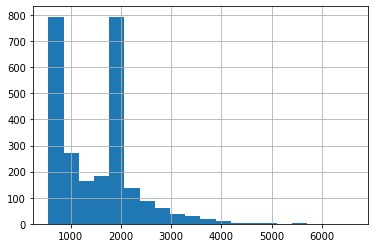

In [72]:
#построим гистограмму для регионов
data[data.city_user=='другое'].users_total_income.hist(bins=20)

<AxesSubplot:>

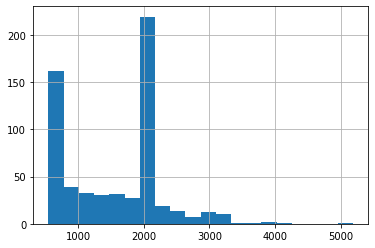

In [73]:
#построим гистограмму для Москвы
data[data.city_user=='Москва'].users_total_income.hist(bins=20)

In [74]:
ttest_ind(data[data.city_user=='Москва'].users_total_income, data[data.city_user=='другое'].users_total_income)

Ttest_indResult(statistic=0.7005246174525382, pvalue=0.4836504757759247)

#### Вывод

 Значение pvalue равно 0.4836504757759247 и оно больше значения alpha, поэтому делаем вывод, что средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов. 

### Общий вывод

 Проанализировав данные можно сделать следующий вывод: пользователи тарифа "Смарт" приносят меньше дохода, т.к их средняя выручка составляет 1257.588605, а выручка тарифа "Ультра" равна 2070.152284. А также можно говорить о том, что пользователи в регионах приносят меньший доход, чем пользователи из Москвы.